# Machine learning HW_03


Домашнее задание №3  
В данном домашнем задании вам необходимо будет научиться кластеризовать данные о пациентах с заболеваниями спины. В данных приведены измерения по 6 переменным:   
• pelvic incidence  
• pelvic tilt  
• lumbar lordosis angle  
• sacral slope  
• pelvic radius  
• degree_spondylolisthesis  
• class  

Для кластеризации в данном задании вам предлагается взять переменные pelvic_radius и degree_spondylolisthesis. Однако, вы можете поэкспериментировать и предложить другие переменные.  
1. Нарисуйте Scatter-Plot для базовой классификации (данные лежат в переменной class). (1балл)
NB! Для следующий операций создайте отдельный датасет, который не содержит переменной class.
2. Оцените, какое количество кластеров будет оптимальным для этих данных. Изобразите график. (2 балла)  
3. Напишите классификатор Kmeans на основании данных об оптимальном числе кластеров, проведите кластеризацию на ваших данных. Визуализируйте полученные результаты и отразите центроиды на графике. (2 + 2 балла)  
4. Напишите иерархический классификатор (агломеративный алгоритм) , попробуйте подобрать метод, который лучше всего будет кластеризовать. (2 + 2 балла)  
5. Визуализируйте полученные результаты иерархической кластеризации. Предположите, какой из них работает лучше всего. (1 + 1 балл)  
6. Сравните метрики качества модели ( 'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' ARI'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' , 'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' AMI'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' ,'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' Homogenity'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' 'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' Completeness'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' , 'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' V-measure'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' 'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' Silhouette'ARI', 'AMI','Homogenity' 'Completeness', 'V-measure' ). На основании полученных метрик сделайте вывод о том, какой алгоритм использовать лучше всего (1 + 2 балла).

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import decomposition
from sklearn import metrics
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs

from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
import warnings
%matplotlib inline

In [2]:
data = pd.read_csv("column_3C_weka.csv")
data = data.query('degree_spondylolisthesis < 400 ')

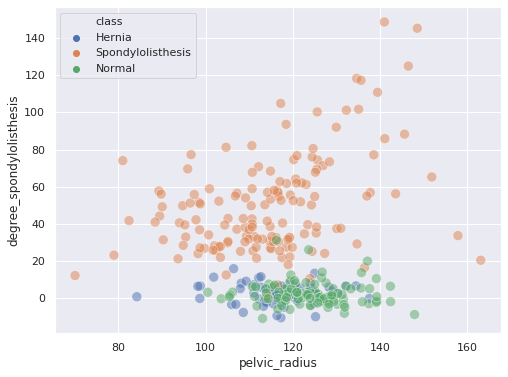

In [7]:
sns.set(rc={'figure.figsize':(8,6)})
sns.scatterplot(x="pelvic_radius", y="degree_spondylolisthesis",hue="class",data=data,s=100,alpha=0.5)

In [8]:
X =  data.drop("class",axis=1)
y = data.loc[:,"class"]

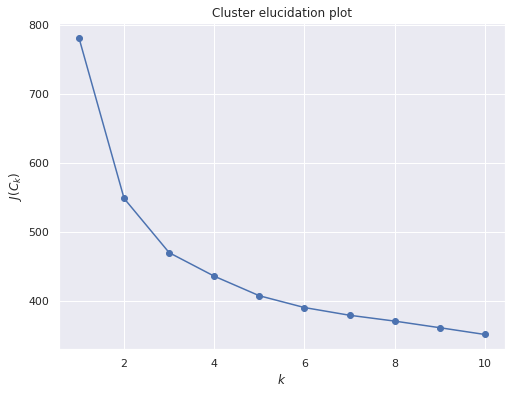

In [9]:
#расчет количества кластеров
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0)
    km.fit(X)
    distortions.append(np.sqrt(km.inertia_))

# plot


plt.plot(range(1, 11), distortions, marker='o')
plt.title("Cluster elucidation plot")
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.show()

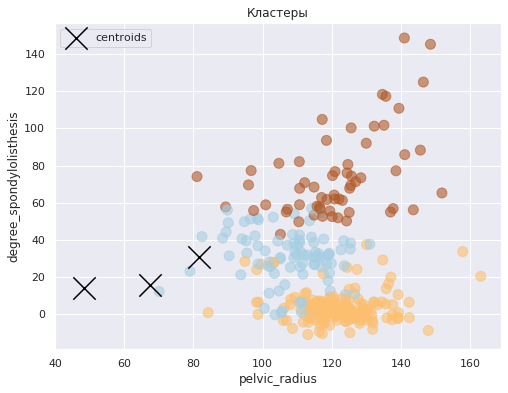

In [12]:
km = KMeans(n_clusters=3,random_state=0,).fit(X)
y_kmeans = km.predict(X)

plt.scatter(X.pelvic_radius, 
            X.degree_spondylolisthesis, 
            c=y_kmeans,
            cmap=plt.cm.Paired,
            s=100,alpha=.6)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],marker="x",c='black',s=500,label='centroids')
plt.legend(scatterpoints=1)
plt.title("Кластеры")
plt.xlabel("pelvic_radius")
plt.ylabel("degree_spondylolisthesis")
plt.show()

Напишите иерархический классификатор (агломеративный алгоритм) , попробуйте подобрать метод, который лучше всего будет кластеризовать. (2 + 2 балла) 

In [196]:
linkages = ['average','single','complete']
distances = ['braycurtis', 'canberra', 'chebyshev','correlation','hamming','minkowski','seuclidean','sqeuclidean']
# классическая евклидова метрика вшита в цикл

y = data.loc[:,'class'] # провека по кластеру
clust_1 = 2
clust_n = 11

In [189]:
warnings.filterwarnings('ignore')
metrics_dict ={}
for linkage in linkages:
    if linkage != 'ward':
        for distance in distances:
            for Ncluster in range(clust_1,clust_n):
                alg = AgglomerativeClustering(n_clusters=Ncluster,linkage=linkage,affinity='precomputed').\
                fit(pairwise_distances(X,metric=distance))
    
                # calculating statistics 
                ARI_value = metrics.adjusted_rand_score(y, alg.labels_)
                AMI_value = metrics.adjusted_mutual_info_score(y, alg.labels_)
                homogenity = metrics.homogeneity_score(y, alg.labels_)
                completeness  = metrics.completeness_score(y, alg.labels_)
                v_measure = metrics.v_measure_score(y, alg.labels_)
                silhouette = metrics.silhouette_score(X, alg.labels_)
    
                # combining statistics for algorithm with certain parameters
                stat_data = [ARI_value, AMI_value,homogenity,completeness,v_measure,silhouette]
                #stat_data = [round(x,3) for x in stat_data]
                
                # create algorithm name
                list_name = list(map(str,[linkage,distance,Ncluster]))
                alg_name = "_".join(list_name)
                metrics_dict.update({str(alg_name):stat_data})
                
    elif linkage == 'ward': # works only with eucledian distance
        for Ncluster in range(clust_1,clust_n):
                distance = "euclidean"
                # creation working classifier
                alg = AgglomerativeClustering(n_clusters=Ncluster,linkage=linkage,affinity='precomputed').\
                fit(pairwise_distances(X,metric=distance))
    
                # calculating statistics 
                ARI_value = metrics.adjusted_rand_score(y, alg.labels_)
                AMI_value = metrics.adjusted_mutual_info_score(y, alg.labels_)
                homogenity = metrics.homogeneity_score(y, alg.labels_)
                completeness  = metrics.completeness_score(y, alg.labels_)
                v_measure = metrics.v_measure_score(y, alg.labels_)
                silhouette = metrics.silhouette_score(X, alg.labels_)
    
                # combining statistics for algorithm with certain parameters
                stat_data = [ARI_value, AMI_value,homogenity,completeness,v_measure,silhouette]
                #stat_data = [round(x,3) for x in stat_data]
                
                # create algorithm name
                #distance = "euclidean"
                list_name = list(map(str,[linkage,distance,Ncluster]))
                alg_name = "_".join(list_name)
                metrics_dict.update({str(alg_name):stat_data})

metrics_dict = pd.DataFrame.from_dict(metrics_dict).rename(index={0:"ARI",
                                                                 1:"AMI",
                                                                  2:"homogenity",
                                                                  3:"completeness",
                                                                  4:"v_measure",
                                                                  5:"silhouette"}).T.sort_values("silhouette",ascending=False)

In [190]:
params = pd.DataFrame.from_records(pd.Series(metrics_dict.index).str.split("_"),\
                          columns=["linkage","distance","n_clusters"])
metrics_dict.reset_index(drop=True, inplace=True)
metrics_dict = pd.concat([params, metrics_dict], axis=1)

In [191]:
metrics_dict.head(10)

,linkage,distance,n_clusters,ARI,AMI,homogenity,completeness,v_measure,silhouette
0,average,minkowski,2,-0.006462,0.003027,0.006891,0.130494,0.013091,0.555584
1,average,seuclidean,2,-0.006462,0.003027,0.006891,0.130494,0.013091,0.555584
2,average,sqeuclidean,2,-0.006462,0.003027,0.006891,0.130494,0.013091,0.555584
3,single,minkowski,2,-0.002227,-0.000964,0.002286,0.108611,0.004478,0.529076
4,single,chebyshev,2,-0.002227,-0.000964,0.002286,0.108611,0.004478,0.529076
5,single,sqeuclidean,2,-0.002227,-0.000964,0.002286,0.108611,0.004478,0.529076
6,complete,correlation,2,-0.018910,0.019932,0.023367,0.169303,0.041066,0.484913
7,complete,chebyshev,2,-0.024301,0.029766,0.033044,0.185425,0.056093,0.469681
8,average,chebyshev,2,-0.004556,0.133720,0.136472,0.311721,0.189835,0.454759
9,average,minkowski,3,0.006549,0.152330,0.158306,0.311541,0.209936,0.438870


в теории, у нас нет колонки с размеченным классами и мы не можем пользовться метриками кроме silhuette (так как несчет сравнить успешность кластеризации) и брать топовые параметры по метрике silhuette. но кроме этого, нужно понимать свои данные: значимы ли двойные нули или нет. в нашем случае да, потому будет оценивать только метрики, которые учитывают двойные нули: уберем из датафрейма все результаты метрик,неучитывающих двойные нули

In [208]:
metrics_dict2 = metrics_dict.query('["minkowski","seuclidean","euclidean","manhattan","chebyshev","sqeuclidean"] not in distance')
metrics_dict2.head(10)

,linkage,distance,n_clusters,ARI,AMI,homogenity,completeness,v_measure,silhouette
6,complete,correlation,2,-0.018910,0.019932,0.023367,0.169303,0.041066,0.484913
19,single,correlation,2,-0.002227,-0.000964,0.002286,0.108611,0.004478,0.409466
21,average,correlation,3,-0.025746,0.025893,0.033044,0.164439,0.055030,0.402067
29,average,correlation,2,-0.006462,0.003027,0.006891,0.130494,0.013091,0.367819
35,complete,canberra,2,0.566845,0.431864,0.433654,0.652316,0.520971,0.361704
40,average,braycurtis,2,0.416535,0.288956,0.291197,0.441622,0.350970,0.332714
42,average,correlation,4,-0.025834,0.022796,0.033044,0.159694,0.054758,0.320282
43,average,braycurtis,3,0.336169,0.299857,0.304389,0.364789,0.331863,0.311404
44,average,correlation,6,0.154557,0.300987,0.313178,0.380433,0.343545,0.308855
46,average,braycurtis,4,0.334658,0.297161,0.304389,0.356562,0.328416,0.300888


таким образом лучшими параметрами для кластеризации нашего датасета является:
расстояние - коэффициент корреляции Пирсона
метод - average  
количество кластеров - 2 или 3 (просто у нас есть заранее данные, поэтому так можно 